In [50]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

In [51]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

In [52]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


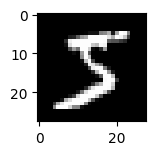

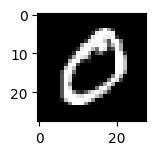

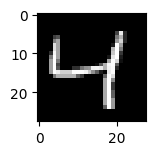

In [53]:
for i in range(3):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [54]:
# shuffle my_data
X = train_X.reshape(60000, 28*28)
perm = np.random.permutation(X.shape[0])
X = X[perm]
y = train_y[perm]
# reduce the size of the data
n = 1000
X = X[:n]
y = y[:n]

In [55]:
gm = GaussianMixture(n_components=10, random_state=0).fit(X)

In [56]:
# test_X = test_X.reshape(10000, 28*28)
# perm = np.random.permutation(test_X.shape[0])
# X = test_X[perm]
# y = test_y[perm]
# n = 1000
# X = X[:n]
# y = y[:n]

In [57]:
y_pred = gm.predict(X)

In [58]:
y_pred[:10]

array([5, 1, 3, 9, 6, 5, 7, 8, 5, 7])

In [59]:
y[:10]

array([8, 8, 4, 6, 8, 9, 5, 0, 4, 3], dtype=uint8)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y, y_pred)

0.155

In [70]:
mask_3 = y == 1
X_3 = X[mask_3]

In [71]:
out = gm.predict(X_3)

(array([99.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

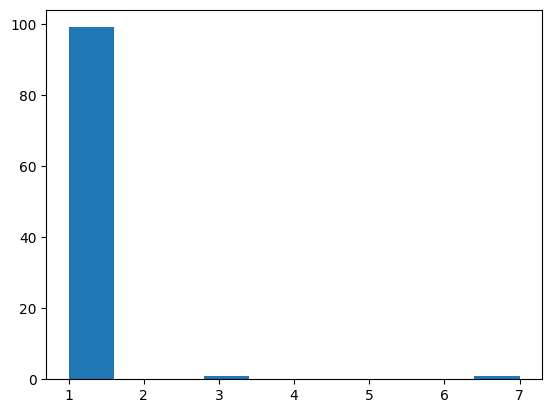

In [72]:
plt.hist(out)